In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=["Date"])

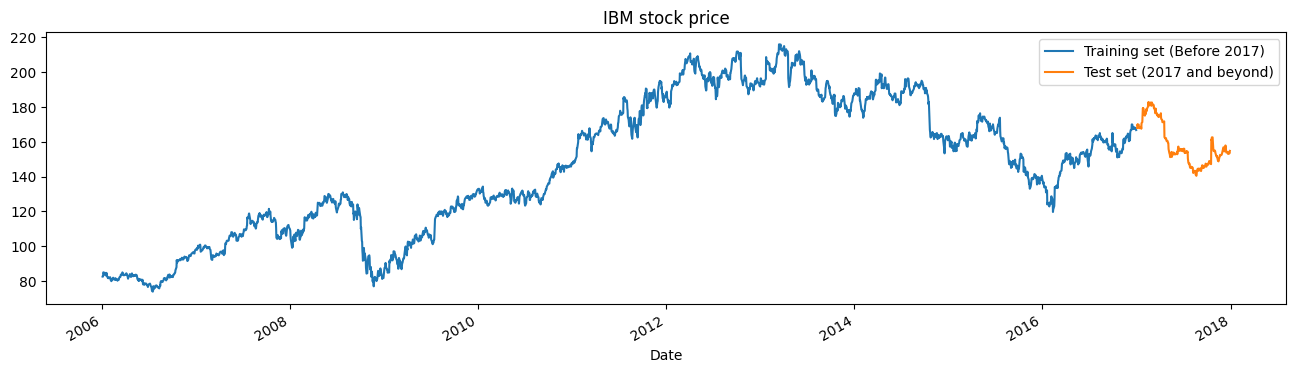

In [11]:
import matplotlib.pyplot as plt
df["High"][:'2016'].plot(figsize=(16, 4), legend=True)
df["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [12]:
trainning_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)

In [14]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 22s 145ms/step - loss: 0.0204
Epoch 2/50
85/85 [==============================] - 13s 151ms/step - loss: 0.0077
Epoch 3/50
85/85 [==============================] - 14s 164ms/step - loss: 0.0073
Epoch 4/50
85/85 [==============================] - 14s 165ms/step - loss: 0.0069
Epoch 5/50
85/85 [==============================] - 13s 152ms/step - loss: 0.0064
Epoch 6/50
85/85 [==============================] - 12s 141ms/step - loss: 0.0063
Epoch 7/50
85/85 [==============================] - 14s 165ms/step - loss: 0.0053
Epoch 8/50
85/85 [==============================] - 14s 163ms/step - loss: 0.0057
Epoch 9/50
85/85 [==============================] - 14s 163ms/step - loss: 0.0054
Epoch 10/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0049
Epoch 11/50
85/85 [==============================] - 13s 155ms/step - loss: 0.0042
Epoch 12/50
85/85 [==============================] - 14s 164ms/step - loss: 0.0043
Epoch 13/50
8

In [17]:
# pre-processing the data
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 40ms/step


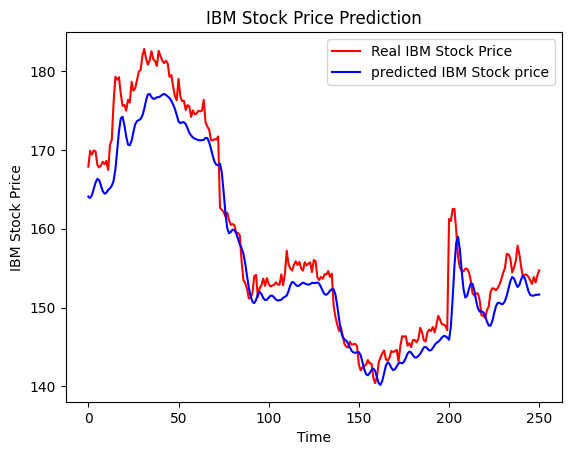

In [18]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real IBM Stock Price")
    plt.plot(prediction, color="blue",label="predicted IBM Stock price")
    plt.title("IBM Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("IBM Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [23]:
from sklearn.metrics import mean_squared_error
import math
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

In [24]:
return_rmse(test_set,predicted_stock_price)

The root mean sqaured error is 3.4853909581724203.
